In [1]:
from pathlib import Path
import sys

lib_path: str = (Path.cwd().parents[1] / "lib").as_posix()
if lib_path not in sys.path:
    sys.path.insert(1, lib_path)

In [2]:
import pandas as pd
from tqdm import tqdm
from torch.cuda import is_available
import os
import pickle
from pykeen_utils import train_pykeen_model
TRAIN_PATH = Path.cwd().parent / 'data' / 'FoodOn' /'train_dataset.tsv'
RESULT_PATH = Path.cwd() / 'save_pykeen_weights' / 'pykeen_weights.pkl'
device = 'gpu' if is_available() else 'cpu'

In [4]:
# checkif the path exists
if not TRAIN_PATH.exists():
    raise FileNotFoundError(f"File {TRAIN_PATH} does not exist")
if RESULT_PATH.exists():
    raise FileNotFoundError(f"File {RESULT_PATH} already exist")

In [10]:
training_data = pd.read_csv(TRAIN_PATH, header=None, names=['head', 'relation', 'tail'])
pipeline_dict = dict(
    model='TransE',
    model_kwargs= dict(
        embedding_dim=100, 
        #scoring_fct_norm=1
    ),
    epochs=5,  # short epochs for testing - you should go higher
    training_loop = 'sLCWA',
    negative_sampler='basic',
    negative_sampler_kwargs=dict(
        num_negs_per_pos=10
    ),
    random_seed = 42,
    device = device
)

INFO:pykeen.triples.splitting:done splitting triples to groups of sizes [113860, 183]
INFO:pykeen.pipeline.api:Using device: cpu


Training epochs on cpu:   0%|          | 0/5 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/712 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/712 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/712 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/712 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/712 [00:00<?, ?batch/s]

Evaluating on cpu:   0%|          | 0.00/183 [00:00<?, ?triple/s]

d:\.VScode\projects\Owls2Vec_star\.conda\lib\site-packages\pykeen\utils.py:537: RuntimeWarning: overflow encountered in scalar add
  return sum(
INFO:pykeen.evaluation.evaluator:Evaluation took 9.36s seconds


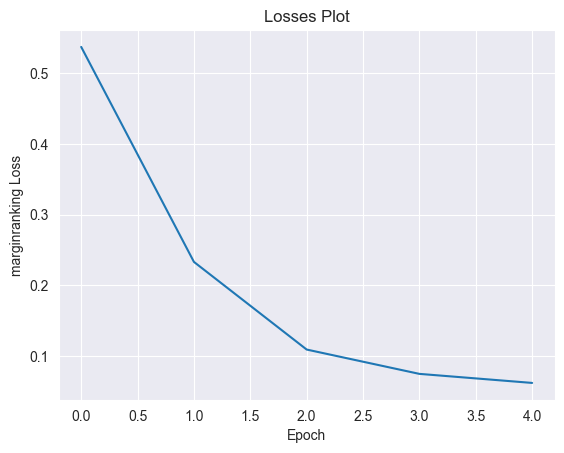

Hits@10: 53.28%
Hits@5: 47.27%
Mean Rank: 277.92


In [11]:
result = train_pykeen_model(
    training_data=training_data,
    pipeline_dict=pipeline_dict,
)

In [12]:
# save results as pickle
with open(RESULT_PATH, 'wb') as f:
    pickle.dump(result, f)